### Heart dataset

In [1]:
#Import required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from feature_engine.outliers import Winsorizer
from scipy.stats.mstats import winsorize

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA
from clusteval import clusteval

In [2]:
#Import the data
df = pd.read_csv(r'D:\360digi\DS\Sharath\Dimension_Reduction_PCA\handson\Datasets_PCA_Problem Statement\heart disease.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### EXPLORATORY DATA ANALYSIS (EDA)

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# Age is used to segregate patients data in the heart dataset. We can ignore the Age column for further analysis.

In [5]:
df1 = df.iloc[:,1:]
df1.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# Checking for duplicates
duplicate = df1.duplicated()
print(duplicate)
sum(duplicate) # no duplicate records

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool


1

In [7]:
duplicate.unique()   #It contains a 'True' value indicating the duplicate record exists.

array([False,  True])

In [8]:
#Remove duplicates
df1 = df1.drop_duplicates()

In [9]:
# Check for missing values
df1.isnull().sum()

sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       302 non-null    int64  
 1   cp        302 non-null    int64  
 2   trestbps  302 non-null    int64  
 3   chol      302 non-null    int64  
 4   fbs       302 non-null    int64  
 5   restecg   302 non-null    int64  
 6   thalach   302 non-null    int64  
 7   exang     302 non-null    int64  
 8   oldpeak   302 non-null    float64
 9   slope     302 non-null    int64  
 10  ca        302 non-null    int64  
 11  thal      302 non-null    int64  
 12  target    302 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 33.0 KB


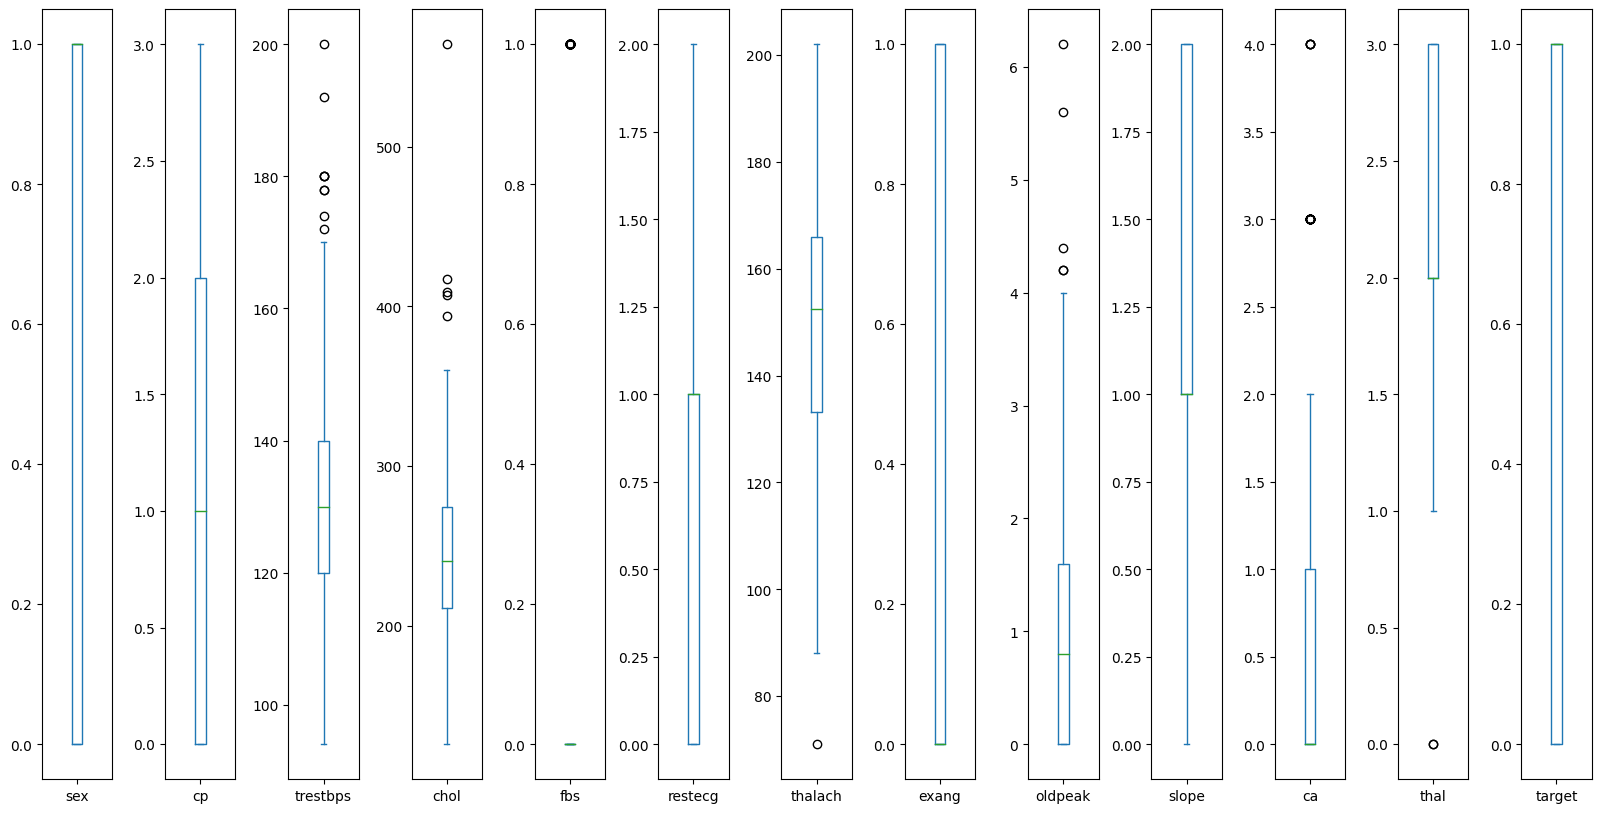

In [11]:
# Box plot visualization to check for outliers

df1.plot(kind = 'box', subplots = True, sharey = False, figsize = (20,10))
plt.subplots_adjust(wspace = 0.75)
plt.show()

# trestbps, chol, fbs, thalach, oldpeak, ca, thal coulmns have outliers.   

#### Winsorization

In [12]:
# Winsorization for "trestbps" column
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['trestbps'])

df1['trestbps'] = winsor.fit_transform(df1[['trestbps']])

In [13]:
# Winsorization for "chol" column
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['chol'])

df1['chol'] = winsor.fit_transform(df1[['chol']])

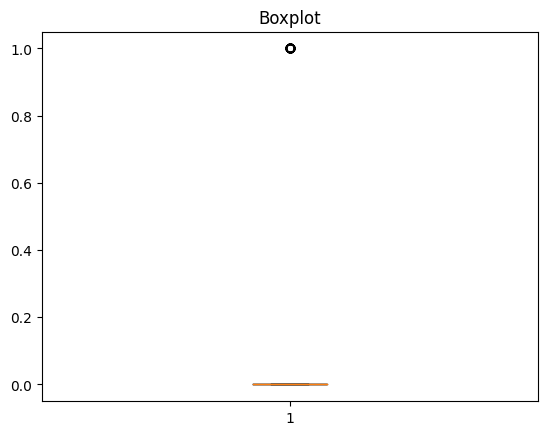

In [14]:
plt.boxplot(df1.fbs);plt.title('Boxplot');plt.show()

(array([257.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  45.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

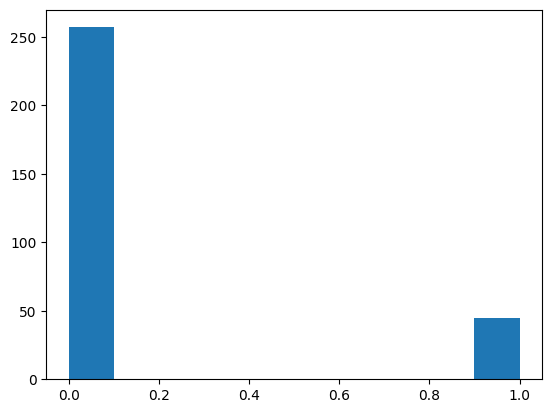

In [15]:
plt.hist(df1.fbs)

In [16]:
df1.fbs.min()

0

In [17]:
df1.fbs.max()

1

In [18]:
df1.fbs.var()

0.12722492354403644

In [ ]:
# Winsorization for "fbs" column
# df1['fbs'] = winsorize(df1.fbs, limits = [0, 1])


In [19]:
# Winsorization for "thalach" column
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['thalach'])

df1['thalach'] = winsor.fit_transform(df1[['thalach']])

In [20]:
# Winsorization for "oldpeak" column
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['oldpeak'])

df1['oldpeak'] = winsor.fit_transform(df1[['oldpeak']])

In [21]:
# Winsorization for "ca" column
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['ca'])

df1['ca'] = winsor.fit_transform(df1[['ca']])

In [22]:
# Winsorization for "thal" column
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['thal'])

df1['thal'] = winsor.fit_transform(df1[['thal']])

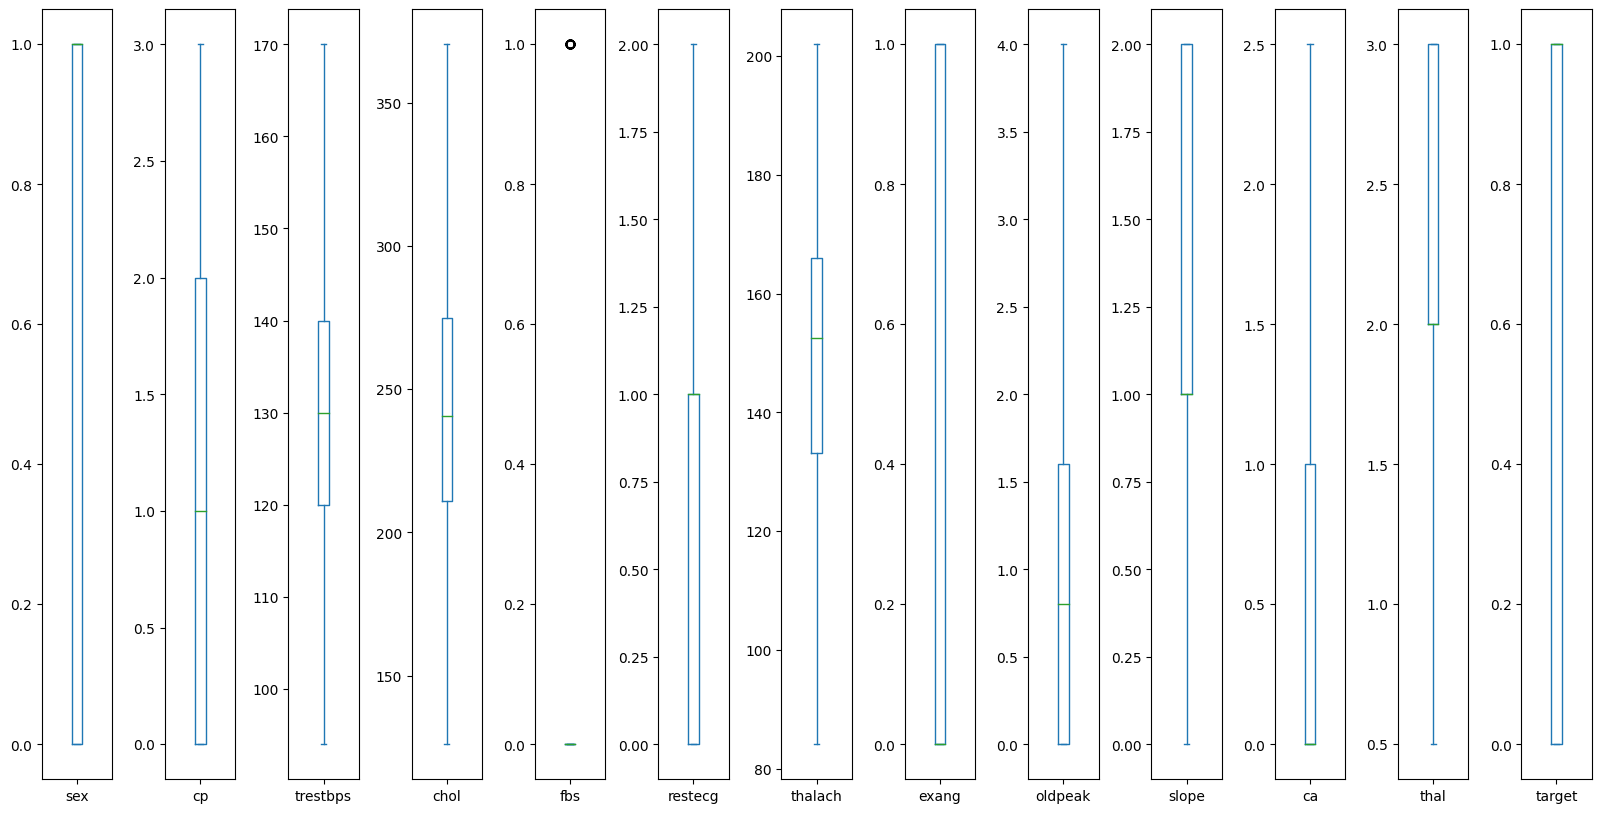

In [23]:
#Box plot visualization to view after the removal of outliers.

df1.plot(kind = 'box', subplots = True, sharey = False, figsize = (20, 10))

plt.subplots_adjust(wspace = 0.75)
plt.show()

In [24]:
df1

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,1.0,1
1,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,2.0,1
2,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,2.0,1
3,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0.0,2.0,1
4,0,0,120.0,354.0,0,1,163.0,1,0.6,2,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,140.0,241.0,0,1,123.0,1,0.2,1,0.0,3.0,0
299,1,3,110.0,264.0,0,1,132.0,0,1.2,1,0.0,3.0,0
300,1,0,144.0,193.0,1,1,141.0,0,3.4,1,2.0,3.0,0
301,1,0,130.0,131.0,0,1,115.0,1,1.2,1,1.0,3.0,0


In [25]:
df1.var()

sex            0.217553
cp             1.065114
trestbps     275.733735
chol        2254.985097
fbs            0.127225
restecg        0.276705
thalach      518.289982
exang          0.221084
oldpeak        1.232978
slope          0.379794
ca             0.774823
thal           0.362071
target         0.248971
dtype: float64

In [26]:
 # (df1 == 0).all() 

### Normalization

In [27]:
pipe1 = make_pipeline(MinMaxScaler())

In [28]:
df_norm = pd.DataFrame(pipe1.fit_transform(df1), columns = df1.columns, index = df1.index)
df_norm.head() 

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1.0,1.000000,0.671053,0.437852,1.0,0.0,0.558855,0.0,0.575,0.0,0.0,0.2,1.0
1,1.0,0.666667,0.473684,0.507417,0.0,0.5,0.872747,0.0,0.875,0.0,0.0,0.6,1.0
2,0.0,0.333333,0.473684,0.319182,0.0,0.0,0.745493,0.0,0.350,1.0,0.0,0.6,1.0
3,1.0,0.333333,0.342105,0.450128,0.0,0.5,0.796394,0.0,0.200,1.0,0.0,0.6,1.0
4,0.0,0.000000,0.342105,0.932992,0.0,0.5,0.669141,1.0,0.150,1.0,0.0,0.6,1.0


In [29]:
df_norm.describe() # scale is normalized to min = 0; max = 1

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,0.682119,0.321192,0.490241,0.488500,0.149007,0.263245,0.555572,0.327815,0.256954,0.698675,0.266225,0.727152,0.543046
std,0.466426,0.344015,0.218490,0.194319,0.356686,0.263014,0.193137,0.470196,0.277599,0.308137,0.352096,0.240689,0.498970
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.342105,0.347826,0.000000,0.000000,0.416755,0.000000,0.000000,0.500000,0.000000,0.600000,0.000000
50%,1.000000,0.333333,0.473684,0.468542,0.000000,0.500000,0.580064,0.000000,0.200000,0.500000,0.000000,0.600000,1.000000
75%,1.000000,0.666667,0.605263,0.608696,0.000000,0.500000,0.694592,1.000000,0.400000,1.000000,0.400000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Clustering Model Building

### Hierarchical Clustering - Agglomerative Clustering

In [30]:
%matplotlib inline

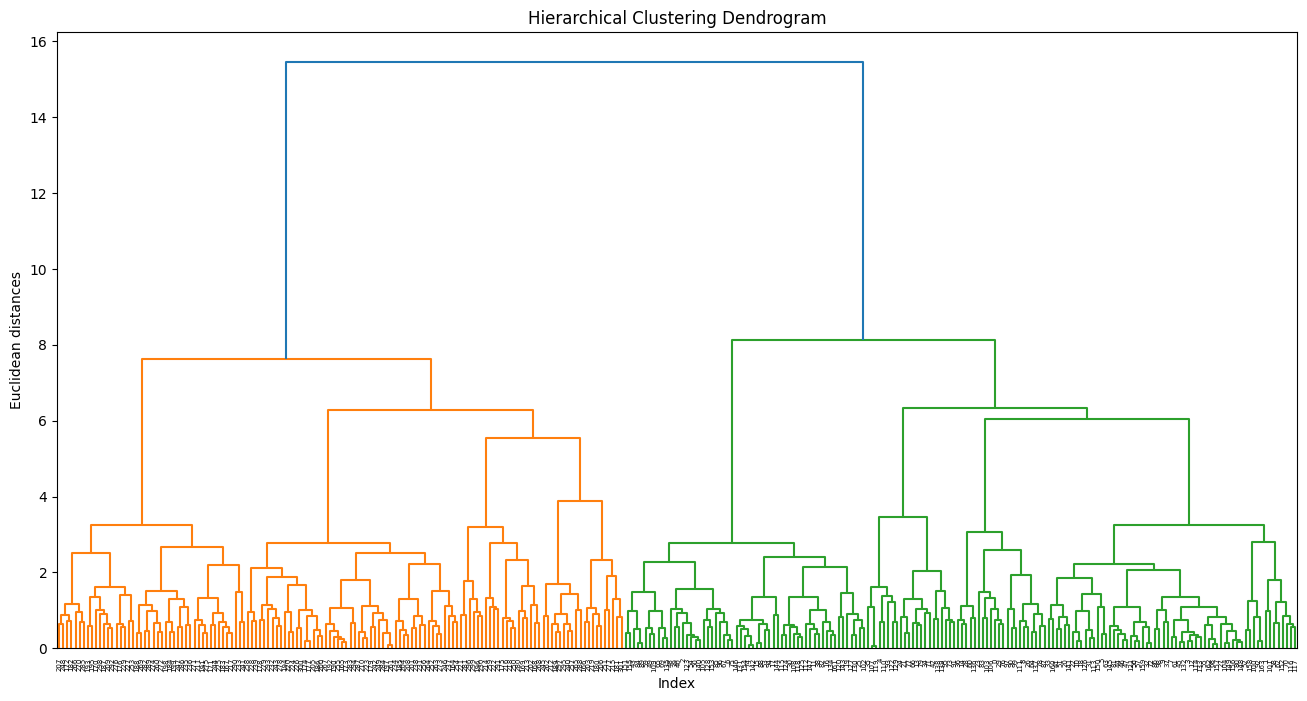

In [31]:
plt.figure(1, figsize = (16,8))
tree_plot = dendrogram(linkage(df_norm, method = "ward"))

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Euclidean distances')
plt.show()

In [32]:
# Applying Agglomerative Clustering choosing 4 as clusters from the above dendrogram
hc1 = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'complete')

y_hc1 = hc1.fit_predict(df_norm)
y_hc1

array([0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1,
       1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2,

In [33]:
#average linkage
hc2 = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'average')

y_hc2 = hc2.fit_predict(df_norm)
y_hc2

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,

In [34]:
#single linkage
hc3 = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'single')

y_hc3 = hc3.fit_predict(df_norm)
y_hc3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [35]:
# ward's
hc4 = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')

y_hc4 = hc4.fit_predict(df_norm)
y_hc4

array([0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2,
       0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0,
       2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2,
       2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 3, 1, 1, 3, 3, 3, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 3, 3, 1, 1, 3, 1, 3, 1, 3, 1, 1,
       3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1, 3,
       1, 1, 3, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1,
       1, 1, 3, 1, 1, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3,
       3, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1,

In [36]:
# Add cluster labels to original Dataset
cluster_labels = pd.Series(hc1.labels_)
df1['cluster'] = cluster_labels
df1.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cluster
0,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,1.0,1,0.0
1,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,2.0,1,3.0
2,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,2.0,1,0.0
3,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0.0,2.0,1,0.0
4,0,0,120.0,354.0,0,1,163.0,1,0.6,2,0.0,2.0,1,0.0


In [37]:
#Silhouette cluster evaluation.
ce = clusteval(evaluate='silhouette')

In [38]:
df_array = np.array(df_norm)


[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|█████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 287.59it/s]

[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [10].
[clusteval] >Fin.


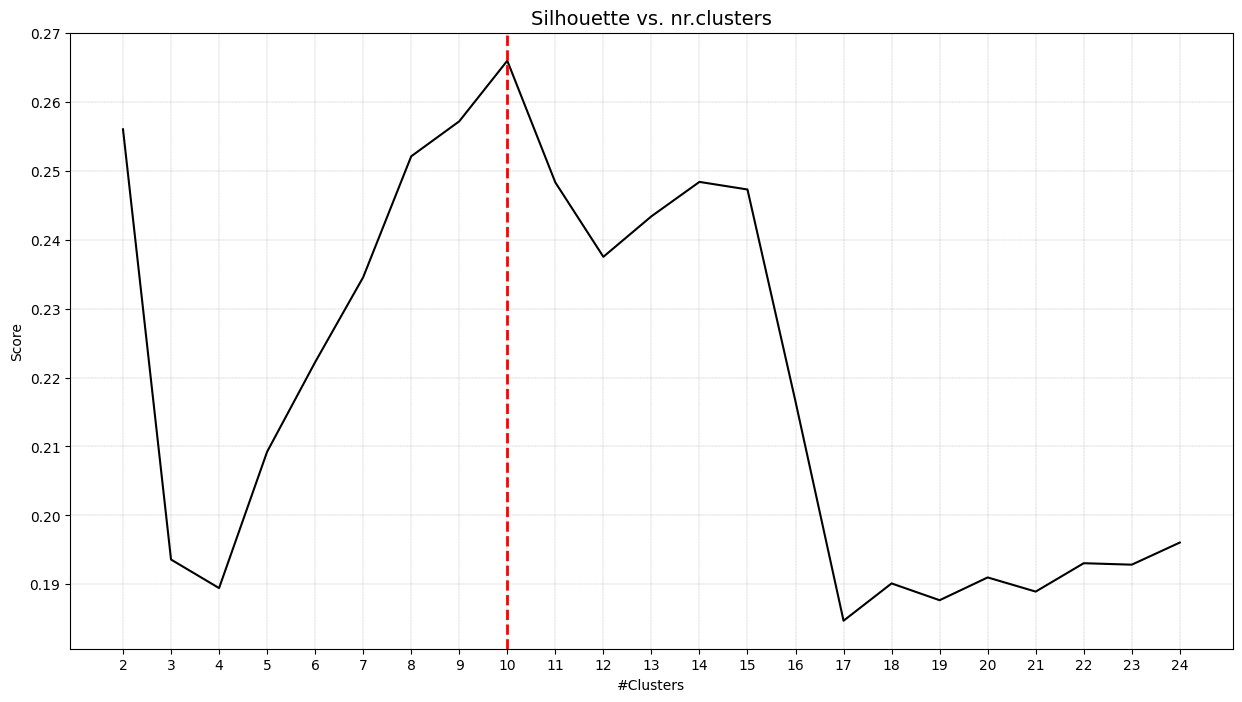

(<Figure size 1500x800 with 1 Axes>,
 <AxesSubplot:title={'center':'Silhouette vs. nr.clusters'}, xlabel='#Clusters', ylabel='Score'>)

In [39]:
#Fit
ce.fit(df_array)

ce.plot()

In [ ]:
## Using the report from clusteval library building 10 clusters
# Fit using agglomerative with metric: euclidean, and linkage: ward

In [40]:
# Applying AgglomerativeClustering with = 10 as clusters
hc_2 = AgglomerativeClustering(n_clusters = 10, affinity = 'euclidean', linkage = 'ward')

y_hc_2 = hc_2.fit_predict(df_norm)
y_hc_2

array([2, 0, 5, 0, 9, 0, 5, 0, 2, 0, 0, 5, 0, 7, 2, 5, 5, 5, 0, 5, 0, 7,
       0, 2, 7, 5, 2, 0, 2, 2, 5, 0, 0, 0, 7, 9, 2, 0, 5, 5, 5, 0, 7, 5,
       0, 0, 0, 0, 5, 5, 5, 0, 0, 5, 5, 0, 0, 0, 0, 5, 2, 0, 0, 0, 2, 5,
       7, 5, 0, 5, 0, 7, 0, 7, 5, 5, 2, 7, 2, 7, 0, 0, 5, 2, 5, 5, 0, 2,
       5, 5, 2, 7, 0, 9, 5, 7, 5, 2, 0, 2, 0, 0, 5, 2, 0, 5, 2, 9, 5, 5,
       9, 2, 5, 0, 0, 5, 0, 0, 5, 9, 5, 0, 9, 5, 5, 5, 0, 5, 5, 9, 5, 5,
       0, 0, 5, 5, 2, 2, 7, 7, 5, 0, 5, 5, 5, 0, 5, 5, 0, 0, 0, 5, 0, 5,
       5, 5, 0, 0, 0, 0, 0, 5, 0, 0, 6, 6, 4, 1, 3, 3, 1, 1, 1, 6, 6, 3,
       1, 6, 6, 6, 4, 4, 1, 1, 1, 6, 6, 1, 1, 8, 6, 1, 6, 1, 6, 1, 3, 6,
       1, 1, 6, 6, 3, 4, 6, 6, 4, 1, 6, 1, 6, 1, 8, 3, 3, 4, 3, 1, 3, 4,
       6, 3, 3, 6, 6, 1, 6, 1, 6, 1, 3, 6, 6, 1, 6, 1, 1, 6, 6, 6, 8, 1,
       6, 6, 1, 8, 6, 1, 1, 6, 3, 4, 6, 1, 6, 6, 6, 8, 6, 3, 1, 6, 8, 6,
       6, 8, 1, 6, 3, 1, 1, 1, 1, 6, 1, 1, 1, 4, 6, 6, 3, 3, 1, 6, 6, 1,
       1, 6, 8, 1, 1, 3, 1, 6, 6, 8, 3, 8, 1, 3, 6,

In [41]:
hc_2.labels_

array([2, 0, 5, 0, 9, 0, 5, 0, 2, 0, 0, 5, 0, 7, 2, 5, 5, 5, 0, 5, 0, 7,
       0, 2, 7, 5, 2, 0, 2, 2, 5, 0, 0, 0, 7, 9, 2, 0, 5, 5, 5, 0, 7, 5,
       0, 0, 0, 0, 5, 5, 5, 0, 0, 5, 5, 0, 0, 0, 0, 5, 2, 0, 0, 0, 2, 5,
       7, 5, 0, 5, 0, 7, 0, 7, 5, 5, 2, 7, 2, 7, 0, 0, 5, 2, 5, 5, 0, 2,
       5, 5, 2, 7, 0, 9, 5, 7, 5, 2, 0, 2, 0, 0, 5, 2, 0, 5, 2, 9, 5, 5,
       9, 2, 5, 0, 0, 5, 0, 0, 5, 9, 5, 0, 9, 5, 5, 5, 0, 5, 5, 9, 5, 5,
       0, 0, 5, 5, 2, 2, 7, 7, 5, 0, 5, 5, 5, 0, 5, 5, 0, 0, 0, 5, 0, 5,
       5, 5, 0, 0, 0, 0, 0, 5, 0, 0, 6, 6, 4, 1, 3, 3, 1, 1, 1, 6, 6, 3,
       1, 6, 6, 6, 4, 4, 1, 1, 1, 6, 6, 1, 1, 8, 6, 1, 6, 1, 6, 1, 3, 6,
       1, 1, 6, 6, 3, 4, 6, 6, 4, 1, 6, 1, 6, 1, 8, 3, 3, 4, 3, 1, 3, 4,
       6, 3, 3, 6, 6, 1, 6, 1, 6, 1, 3, 6, 6, 1, 6, 1, 1, 6, 6, 6, 8, 1,
       6, 6, 1, 8, 6, 1, 1, 6, 3, 4, 6, 1, 6, 6, 6, 8, 6, 3, 1, 6, 8, 6,
       6, 8, 1, 6, 3, 1, 1, 1, 1, 6, 1, 1, 1, 4, 6, 6, 3, 3, 1, 6, 6, 1,
       1, 6, 8, 1, 1, 3, 1, 6, 6, 8, 3, 8, 1, 3, 6,

In [42]:
# Add cluster labels to original Dataset
cluster_labels = pd.Series(hc_2.labels_)
df1['cluster_hc'] = cluster_labels
df1.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cluster,cluster_hc
0,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,1.0,1,0.0,2.0
1,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,2.0,1,3.0,0.0
2,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,2.0,1,0.0,5.0
3,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0.0,2.0,1,0.0,0.0
4,0,0,120.0,354.0,0,1,163.0,1,0.6,2,0.0,2.0,1,0.0,9.0


In [43]:
# Aggregate using mean of each cluster
df1.iloc[:,1:].groupby(df1.cluster_hc).mean()

,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cluster,cluster_hc
cluster_hc,,,,,,,,,,,,,,
0.0,1.295082,129.622951,235.950820,0.000000,0.606557,164.901639,0.000000,0.544262,1.655738,0.262295,2.163934,1.0,0.098361,0.0
1.0,0.434783,134.869565,251.956522,0.152174,0.565217,139.654891,0.586957,1.567391,1.130435,1.076087,2.500000,0.0,1.000000,1.0
2.0,1.954545,134.818182,235.562500,1.000000,0.545455,157.045455,0.045455,0.600000,1.545455,0.500000,2.227273,1.0,0.000000,2.0
3.0,0.750000,129.750000,252.650000,0.200000,0.600000,136.700000,0.600000,2.075000,0.950000,0.600000,2.375000,0.0,1.700000,3.0
4.0,0.300000,133.000000,255.600000,0.400000,0.300000,135.200000,0.800000,1.220000,1.200000,1.200000,3.000000,0.0,1.000000,4.0
5.0,1.338983,127.661017,248.504237,0.000000,0.644068,154.949153,0.000000,0.605085,1.559322,0.305085,2.008475,1.0,0.508475,5.0
6.0,0.490196,135.274510,251.250000,0.117647,0.333333,141.549020,0.450980,1.431373,1.254902,1.323529,2.549020,0.0,2.000000,6.0
7.0,1.285714,121.428571,223.714286,0.000000,0.571429,148.928571,1.000000,0.821429,1.571429,0.214286,2.357143,1.0,0.000000,7.0
8.0,0.200000,130.500000,232.600000,0.100000,0.400000,130.600000,0.600000,1.560000,1.300000,0.900000,2.700000,0.0,2.000000,8.0


## KMeans 

In [44]:
## scree plot or elbow curve
TWSS = []
k = list(range(2, 9))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)
    
TWSS

[325.42369915361684,
 283.0158320274828,
 245.8612305555526,
 229.7648243695309,
 214.69225497448028,
 207.65898818293022,
 195.59847767532185]

Text(0, 0.5, 'total_within_SS')

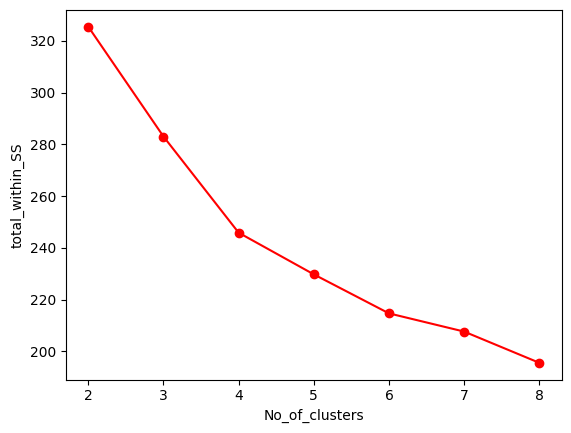

In [45]:
# Creating a scree plot to find out no.of cluster
plt.plot(k, TWSS, 'ro-');
plt.xlabel("No_of_clusters");
plt.ylabel("total_within_SS")

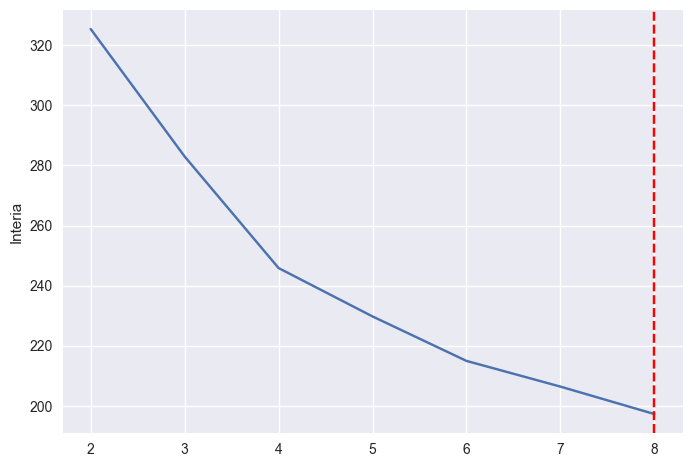

In [46]:
# Using kneeLocator
List = []

for k in range(2, 9):
    kmeans = KMeans(n_clusters = k, init = "random", max_iter = 30, random_state = 1, n_init = 10) 
    kmeans.fit(df_norm)
    List.append(kmeans.inertia_)


from kneed import KneeLocator
kl = KneeLocator(range(2, 9), List, curve = 'convex') 
kl.elbow
plt.style.use("seaborn")
plt.plot(range(2, 9), List)
plt.xticks(range(2, 9))
plt.ylabel("Interia")
plt.axvline(x = kl.elbow, color = 'r', label = 'axvline - full height', ls = '--')
plt.show()

In [47]:
# Detecting the best k=4 using TWSS value from scree plot

In [48]:
model = KMeans(n_clusters = 4)
yy = model.fit(df_norm)

In [49]:
model.labels_

array([1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 1, 3, 1, 1,
       1, 1, 1, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 3, 3, 1, 3, 3, 3, 1, 0, 3,
       1, 1, 1, 1, 3, 3, 3, 1, 1, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3,
       1, 3, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1,
       3, 3, 1, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 3, 3, 3,
       3, 1, 3, 1, 1, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3,
       1, 1, 3, 3, 3, 1, 1, 0, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 1, 3, 1, 3,
       3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0,
       2, 0, 0, 0, 2, 3, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0,

In [50]:
mb = pd.Series(model.labels_)

In [51]:
df1['clust_k'] = mb

In [52]:
df1.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cluster,cluster_hc,clust_k
0,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,1.0,1,0.0,2.0,1.0
1,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,2.0,1,3.0,0.0,1.0
2,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,2.0,1,0.0,5.0,3.0
3,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0.0,2.0,1,0.0,0.0,1.0
4,0,0,120.0,354.0,0,1,163.0,1,0.6,2,0.0,2.0,1,0.0,9.0,3.0


In [53]:
# Evaluation of Number of Clusters using Silhouette Coefficient Technique

In [54]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, init = "random", random_state = 1)
    kmeans.fit(df_norm)
    score = silhouette_score(df_norm, kmeans.labels_)
    k = k
    Sil_coff = score
    silhouette_coefficients.append([k, Sil_coff])

In [55]:
silhouette_coefficients

[[2, 0.25575019243857033],
 [3, 0.21504039113881024],
 [4, 0.23286449851887786],
 [5, 0.2340376595598885],
 [6, 0.24338625065062716],
 [7, 0.2372553885781283],
 [8, 0.21553054413227304],
 [9, 0.2384968935676353],
 [10, 0.24070877502194962]]

In [56]:
# Silhouette Coeffficients shows, the number of clusters k = 2 as the best value

In [57]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       302 non-null    float64
 1   cp        302 non-null    float64
 2   trestbps  302 non-null    float64
 3   chol      302 non-null    float64
 4   fbs       302 non-null    float64
 5   restecg   302 non-null    float64
 6   thalach   302 non-null    float64
 7   exang     302 non-null    float64
 8   oldpeak   302 non-null    float64
 9   slope     302 non-null    float64
 10  ca        302 non-null    float64
 11  thal      302 non-null    float64
 12  target    302 non-null    float64
dtypes: float64(13)
memory usage: 33.0 KB


## Dimension Reduction with PCA

In [58]:
# Define PCA model
pca = PCA(n_components = 13)

In [59]:
num_pipeline = make_pipeline(pca)

In [60]:
# Pass the raw data through pipeline

processed = num_pipeline.fit(df_norm) 
processed

Pipeline(steps=[('pca', PCA(n_components=13))])

In [61]:
# Apply the pipeline on the dataset
df_pca = pd.DataFrame(processed.transform(df_norm))

df_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.432839,-0.439986,0.489774,1.039982,0.819061,-0.165140,0.068284,-0.332694,0.311559,0.123483,0.083017,-0.089072,-0.043803
1,-0.334009,-0.323305,-0.014241,0.089727,1.015799,0.092767,0.411596,-0.144605,-0.128691,0.117615,0.256514,-0.062573,-0.343663
2,-0.792971,0.460102,0.000306,-0.135256,-0.014844,-0.092685,-0.184769,-0.189103,-0.043357,0.007192,0.079333,0.417913,-0.065854
3,-0.584418,-0.451569,-0.286635,-0.151303,-0.074846,-0.050804,0.199229,0.034967,-0.025332,0.098541,0.190343,0.060618,-0.091382
4,-0.269762,0.869072,-0.713093,0.151202,-0.402571,0.066619,0.062317,0.062623,-0.118441,0.087447,0.364548,-0.194707,-0.053232
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.555540,0.909665,-0.355825,-0.071485,-0.026276,-0.245957,-0.109382,0.469072,-0.027121,-0.080024,-0.319426,-0.108965,0.059378
298,0.107496,-0.474910,0.183401,-0.246155,0.586072,0.023941,-0.222156,0.616635,0.103241,-0.374239,0.114267,-0.189474,0.175579
299,0.732595,-0.318621,0.947423,0.269992,-0.018402,-0.266765,0.561725,0.139059,-0.282750,0.090267,0.048805,0.333374,-0.005283
300,0.984479,-0.020934,-0.375784,-0.068582,0.004611,0.042473,0.260373,0.226483,0.068143,-0.117173,-0.406620,0.204806,0.079382


In [62]:
# PCA weights

processed['pca'].components_

array([[ 2.80916447e-01, -2.73054167e-01,  4.13151737e-02,
         2.42017868e-02,  3.15577556e-02, -6.00343966e-02,
        -1.44191247e-01,  4.85432500e-01,  2.18262303e-01,
        -1.98285850e-01,  2.50001169e-01,  1.39096924e-01,
        -6.43734886e-01],
       [-9.07746147e-01, -1.93786270e-01,  4.53503680e-02,
         1.08334064e-01, -7.50828093e-02,  8.97062985e-03,
        -8.96174207e-02,  2.88606444e-01,  8.04460587e-02,
        -1.33227489e-01,  1.42124083e-02, -5.51780054e-02,
        -1.18443752e-02],
       [-2.07449553e-01,  1.63812153e-01,  1.41249246e-01,
         5.66384899e-02,  4.13875332e-01, -9.63986782e-02,
        -1.14623617e-02, -6.01597669e-01,  1.30266593e-01,
        -1.08904631e-01,  4.95565956e-01,  2.79865808e-03,
        -2.99852137e-01],
       [ 4.36299759e-02,  2.59129956e-01,  1.17145449e-01,
        -9.13715293e-03,  7.79382272e-01, -7.60174173e-02,
        -8.73268765e-03,  4.37349675e-01,  3.07526819e-02,
        -1.19671475e-01, -9.42677617e

In [63]:
# Take a closer look at the components
components = pd.DataFrame(processed['pca'].components_, columns = df_norm.columns).T
components.columns = ['pc0', 'pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11', 'pc12']

components

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12
sex,0.280916,-0.907746,-0.207450,0.043630,0.032563,0.013863,0.091981,-0.132331,-0.009111,0.107447,0.036255,-0.105721,0.028289
cp,-0.273054,-0.193786,0.163812,0.259130,0.387973,0.533324,-0.401862,0.362233,0.193277,-0.154626,0.012778,-0.045064,0.052752
trestbps,0.041315,0.045350,0.141249,0.117145,0.078730,0.019500,-0.228588,0.031532,-0.239954,0.817725,-0.419920,-0.012341,-0.000451
chol,0.024202,0.108334,0.056638,-0.009137,-0.067442,0.022213,-0.200374,-0.051413,-0.255933,0.145897,0.575355,-0.712092,0.107962
fbs,0.031558,-0.075083,0.413875,0.779382,-0.232581,-0.339232,0.125882,0.108195,-0.034846,-0.086660,0.081689,0.044929,0.022274
restecg,-0.060034,0.008971,-0.096399,-0.076017,-0.000610,0.095482,0.644673,0.696974,0.003623,0.198602,0.036878,-0.170932,-0.026788
thalach,-0.144191,-0.089617,-0.011462,-0.008733,-0.086186,-0.005991,-0.114422,0.053202,-0.135291,0.029654,0.154226,0.052327,-0.949672
exang,0.485433,0.288606,-0.601598,0.437350,-0.121344,0.304158,-0.087248,0.042302,0.057187,-0.012392,-0.016098,0.000151,-0.086864
oldpeak,0.218262,0.080446,0.130267,0.030753,0.457887,0.131738,0.188891,-0.107251,-0.227671,0.189452,0.547511,0.514325,0.041866
slope,-0.198286,-0.133227,-0.108905,-0.119671,-0.652332,0.126508,-0.269112,0.233187,-0.042458,0.175482,0.297143,0.416916,0.231740


In [64]:
print(processed['pca'].explained_variance_ratio_)

[0.32110711 0.13971851 0.1056717  0.09050658 0.076053   0.05193998
 0.0477467  0.04526116 0.03376861 0.02878556 0.02190809 0.02105787
 0.01647513]


In [65]:
var1 = np.cumsum(processed['pca'].explained_variance_ratio_)

print(var1)

[0.32110711 0.46082562 0.56649733 0.65700391 0.7330569  0.78499688
 0.83274358 0.87800474 0.91177335 0.94055891 0.962467   0.98352487
 1.        ]


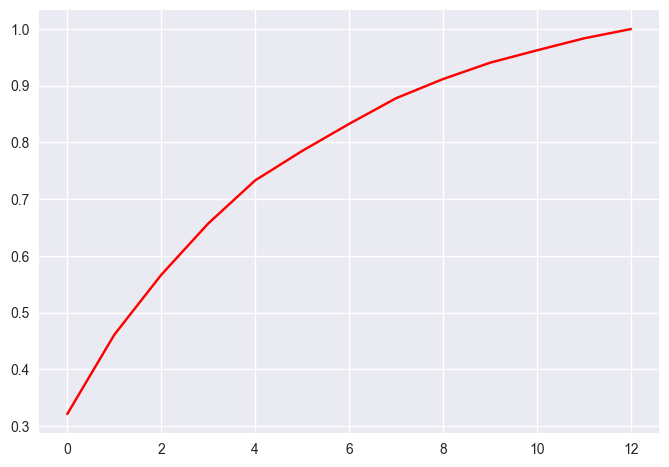

In [66]:
# Variance plot for PCA components obtained 
plt.plot(var1, color = "red")

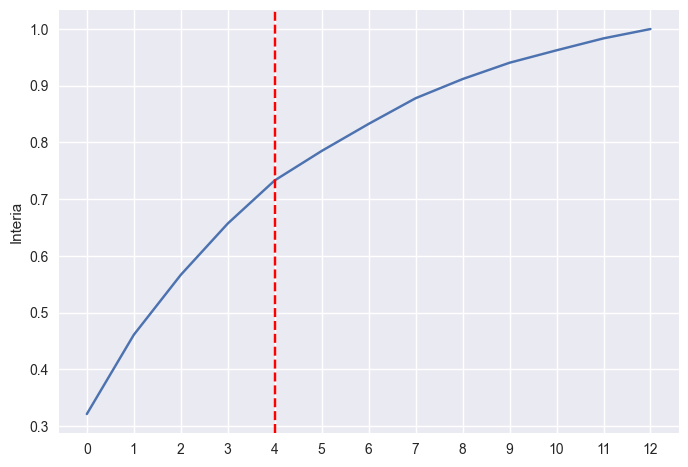

In [67]:
# knee Locator
# from kneed import KneeLocator
kl = KneeLocator(range(len(var1)), var1, curve = 'concave', direction = "increasing") 
# The line is pretty linear hence Kneelocator is not able to detect the knee/elbow appropriately
kl.elbow
plt.style.use("seaborn")
plt.plot(range(len(var1)), var1)
plt.xticks(range(len(var1)))
plt.ylabel("Interia")
plt.axvline(x = kl.elbow, color = 'r', label = 'axvline - full height', ls = '--')
plt.show()

In [ ]:
# Kneelocator recommends 5 PCs as the ideal number of features to be considered

In [ ]:
# PCA for Feature Extraction (We consider 5 PCs)

In [68]:
# Final dataset with manageable number of columns (Feature Extraction)

final = pd.concat([df.age, df_pca.iloc[:, 0:5]], axis = 1)
final.columns = ['age', 'pc0', 'pc1', 'pc2', 'pc3', 'pc4']  
final

,age,pc0,pc1,pc2,pc3,pc4
0,63,-0.432839,-0.439986,0.489774,1.039982,0.819061
1,37,-0.334009,-0.323305,-0.014241,0.089727,1.015799
2,41,-0.792971,0.460102,0.000306,-0.135256,-0.014844
3,56,-0.584418,-0.451569,-0.286635,-0.151303,-0.074846
4,57,-0.269762,0.869072,-0.713093,0.151202,-0.402571
...,...,...,...,...,...,...
298,57,0.107496,-0.474910,0.183401,-0.246155,0.586072
299,45,0.732595,-0.318621,0.947423,0.269992,-0.018402
300,68,0.984479,-0.020934,-0.375784,-0.068582,0.004611
301,57,-0.025762,0.528754,0.514466,-0.413484,0.009836


0      Text(-0.4328388052803883, -0.43998625121096396...
1      Text(-0.3340094059166636, -0.3233047127320262,...
2      Text(-0.7929709555323842, 0.46010170450251764,...
3      Text(-0.5844176586356766, -0.4515688967568348,...
4      Text(-0.2697616490820146, 0.8690716088762968, ...
                             ...                        
298    Text(0.10749558104229677, -0.47491002070722094...
299    Text(0.7325949930440442, -0.31862051705004146,...
300    Text(0.9844787599924145, -0.020933689345509387...
301    Text(-0.025761860538472806, 0.5287540607592791...
302                               Text(nan, nan, '57.0')
Length: 303, dtype: object

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


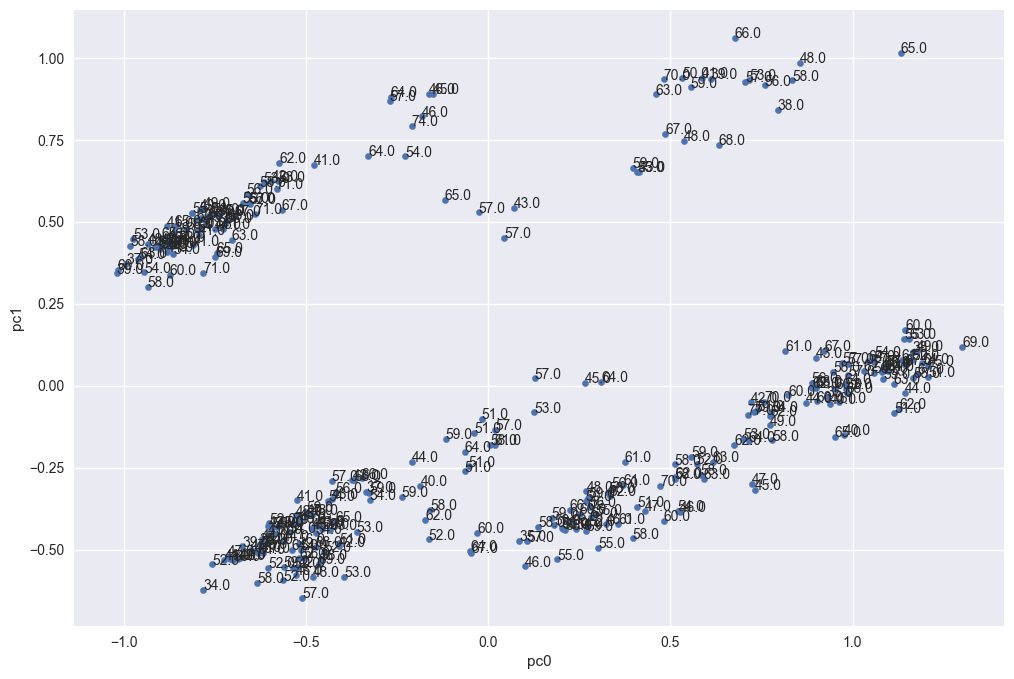

In [69]:
# Scatter diagram
ax = final.plot(x = 'pc0', y = 'pc1', kind = 'scatter', figsize = (12, 8))
final[['pc0', 'pc1', 'age']].apply(lambda x: ax.text(*x), axis = 1)

In [70]:
df_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.432839,-0.439986,0.489774,1.039982,0.819061,-0.165140,0.068284,-0.332694,0.311559,0.123483,0.083017,-0.089072,-0.043803
1,-0.334009,-0.323305,-0.014241,0.089727,1.015799,0.092767,0.411596,-0.144605,-0.128691,0.117615,0.256514,-0.062573,-0.343663
2,-0.792971,0.460102,0.000306,-0.135256,-0.014844,-0.092685,-0.184769,-0.189103,-0.043357,0.007192,0.079333,0.417913,-0.065854
3,-0.584418,-0.451569,-0.286635,-0.151303,-0.074846,-0.050804,0.199229,0.034967,-0.025332,0.098541,0.190343,0.060618,-0.091382
4,-0.269762,0.869072,-0.713093,0.151202,-0.402571,0.066619,0.062317,0.062623,-0.118441,0.087447,0.364548,-0.194707,-0.053232
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.555540,0.909665,-0.355825,-0.071485,-0.026276,-0.245957,-0.109382,0.469072,-0.027121,-0.080024,-0.319426,-0.108965,0.059378
298,0.107496,-0.474910,0.183401,-0.246155,0.586072,0.023941,-0.222156,0.616635,0.103241,-0.374239,0.114267,-0.189474,0.175579
299,0.732595,-0.318621,0.947423,0.269992,-0.018402,-0.266765,0.561725,0.139059,-0.282750,0.090267,0.048805,0.333374,-0.005283
300,0.984479,-0.020934,-0.375784,-0.068582,0.004611,0.042473,0.260373,0.226483,0.068143,-0.117173,-0.406620,0.204806,0.079382


In [71]:
df_res = df_pca.iloc[:, 0:5]
df_res.columns = ['pc0', 'pc1', 'pc2', 'pc3', 'pc4']
df_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pc0     302 non-null    float64
 1   pc1     302 non-null    float64
 2   pc2     302 non-null    float64
 3   pc3     302 non-null    float64
 4   pc4     302 non-null    float64
dtypes: float64(5)
memory usage: 11.9 KB


## Hirerarchical Clustering with PCA dataset

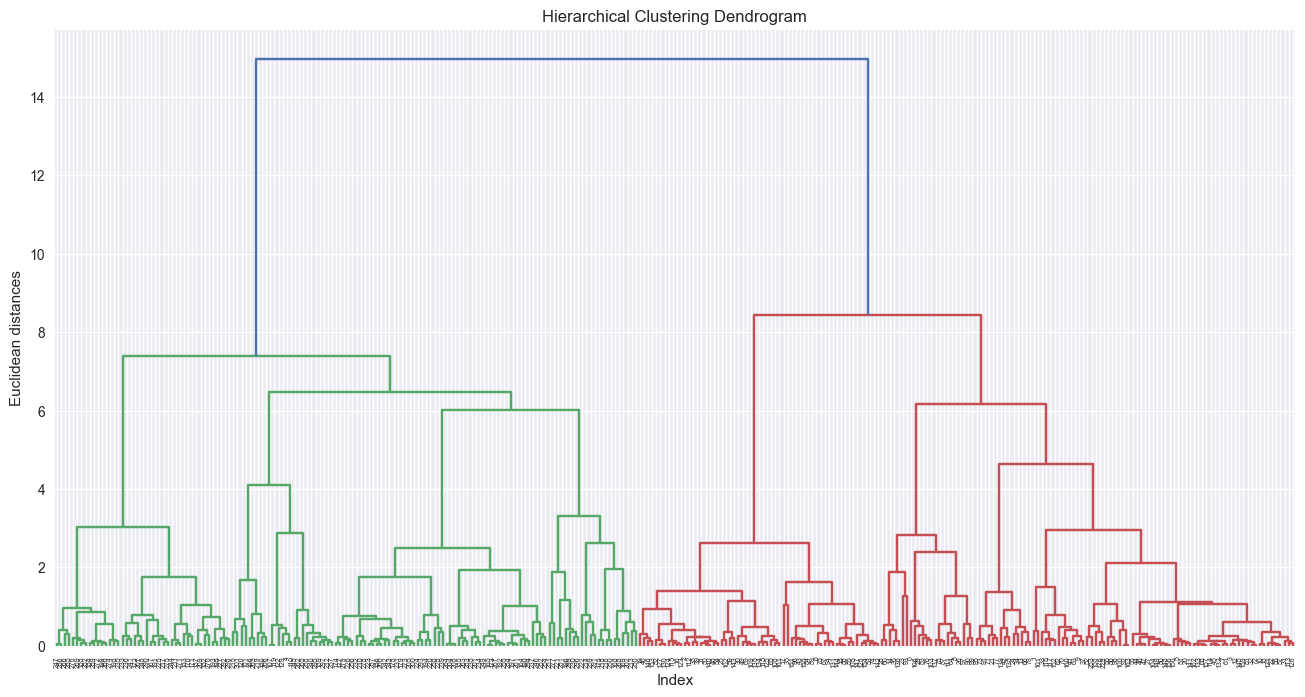

In [72]:
plt.figure(1, figsize = (16, 8))
tree_plot = dendrogram(linkage(df_res, method = "ward"))

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Euclidean distances')
plt.show()

In [73]:
# Applying Agglomerative Clustering choosing 2 as clusters from the above dendrogram
hc_pc1 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'complete')

y_hc_pc1 = hc_pc1.fit_predict(df_res)
y_hc_pc1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [74]:
np.unique(y_hc_pc1)

array([0, 1], dtype=int64)

In [75]:
#average linkage
hc_pc2 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'average')

y_hc_pc2 = hc_pc2.fit_predict(df_res)
y_hc_pc2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,

In [76]:
#single linkage
hc_pc3 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'single')

y_hc_pc3 = hc_pc3.fit_predict(df_res)
y_hc_pc3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [77]:
# ward
hc_pc4 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')

y_hc_pc4 = hc_pc4.fit_predict(df_res)
y_hc_pc4

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [78]:
hc_pc1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [79]:
clust_labels = pd.Series(hc_pc1.labels_)

In [80]:
# Add cluster labels to original Dataset
df1['clust_hc_pca'] = clust_labels
df1.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cluster,cluster_hc,clust_k,clust_hc_pca
0,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,1.0,1,0.0,2.0,1.0,1.0
1,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,2.0,1,3.0,0.0,1.0,1.0
2,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,2.0,1,0.0,5.0,3.0,1.0
3,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0.0,2.0,1,0.0,0.0,1.0,1.0
4,0,0,120.0,354.0,0,1,163.0,1,0.6,2,0.0,2.0,1,0.0,9.0,3.0,1.0


In [81]:
# cluster evaluation

In [82]:
#Silhouette cluster evaluation.
ce = clusteval(evaluate='silhouette')

In [83]:
df_array = np.array(df_res)


[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|█████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 201.15it/s]

[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [10].
[clusteval] >Fin.


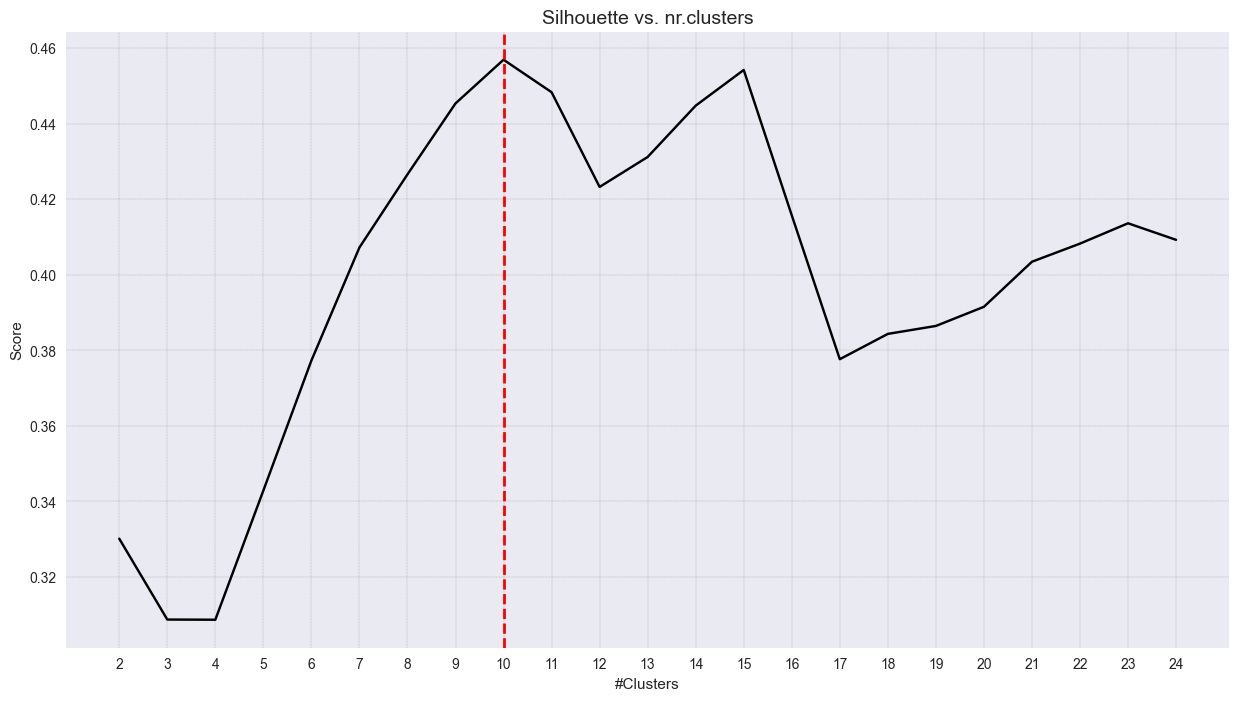

(<Figure size 1500x800 with 1 Axes>,
 <AxesSubplot:title={'center':'Silhouette vs. nr.clusters'}, xlabel='#Clusters', ylabel='Score'>)

In [84]:
#Fit
ce.fit(df_array)

ce.plot()

In [ ]:
## Using the report from clusteval library building 10 clusters is ideal option.


## KMeans Clustering using PCA dataset

In [85]:
###### scree plot or elbow curve ############
TWSS = []
k = list(range(2, 9))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_res)
    TWSS.append(kmeans.inertia_)

TWSS

[207.79572014797137,
 165.71421410657197,
 130.47068047081493,
 114.9082478028719,
 101.86491825185628,
 88.86693217708148,
 81.64362086175245]

Text(0, 0.5, 'total_within_SS')

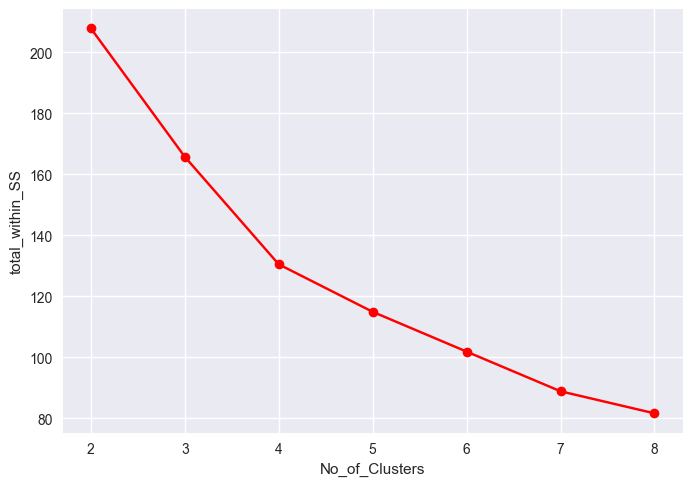

In [86]:
# Creating a scree plot to find out no.of cluster
plt.plot(k, TWSS, 'ro-'); plt.xlabel("No_of_Clusters"); plt.ylabel("total_within_SS")

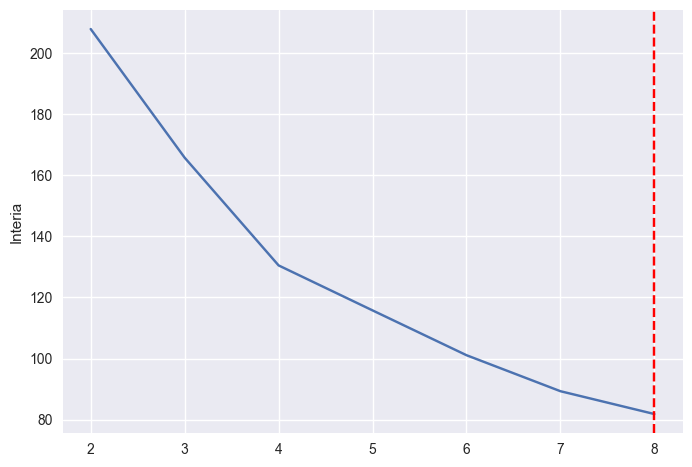

In [87]:
# Using KneeLocator
List = []

for k in range(2, 9):
    kmeans = KMeans(n_clusters = k, init = "random", max_iter = 30, random_state = 1, n_init = 10) 
    kmeans.fit(df_res)
    List.append(kmeans.inertia_)

from kneed import KneeLocator
kl = KneeLocator(range(2, 9), List, curve = 'convex') 
kl.elbow
plt.style.use("seaborn")
plt.plot(range(2, 9), List)
plt.xticks(range(2, 9))
plt.ylabel("Interia")
plt.axvline(x = kl.elbow, color = 'r', label = 'axvline - full height', ls = '--')
plt.show()

In [88]:
# Detecting the best k=4 using TWSS value from scree plot

In [89]:
model1 = KMeans(n_clusters = 4)
yy = model1.fit(df_res)

In [90]:
model1.labels_

array([3, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 3, 0, 3, 3,
       3, 3, 3, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3, 0, 0, 3, 0, 0, 0, 3, 1, 0,
       3, 3, 3, 3, 0, 0, 0, 3, 2, 0, 0, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0,
       3, 0, 3, 0, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3,
       0, 0, 3, 3, 3, 0, 0, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0, 0, 0,
       0, 3, 0, 3, 3, 0, 3, 3, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       3, 3, 0, 0, 0, 3, 3, 1, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 0, 3, 0,
       0, 0, 3, 3, 2, 3, 3, 0, 3, 3, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 0, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1,
       2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1,

In [91]:
mb = pd.Series(model1.labels_) 

In [92]:
df1['clust_k_pca'] = mb # creating a  new column and assigning it to new column 

In [93]:
df1.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cluster,cluster_hc,clust_k,clust_hc_pca,clust_k_pca
0,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,1.0,1,0.0,2.0,1.0,1.0,3.0
1,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,2.0,1,3.0,0.0,1.0,1.0,3.0
2,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,2.0,1,0.0,5.0,3.0,1.0,0.0
3,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0.0,2.0,1,0.0,0.0,1.0,1.0,3.0
4,0,0,120.0,354.0,0,1,163.0,1,0.6,2,0.0,2.0,1,0.0,9.0,3.0,1.0,0.0


In [ ]:
# Evaluation of Number of Clusters using Silhouette Coefficient Technique

In [94]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []

for k in range (2, 11):
    kmeans = KMeans(n_clusters = k, init = "random", random_state = 1)
    kmeans.fit(df_res)
    score = silhouette_score(df_res, kmeans.labels_)
    k = k
    Sil_coff = score
    silhouette_coefficients.append([k, Sil_coff])

In [95]:
silhouette_coefficients.sort(key=lambda x:x[1])

print(silhouette_coefficients)

[[3, 0.3368341254258753], [2, 0.34750155083621725], [4, 0.3761375272015713], [5, 0.3874979517032113], [6, 0.40720655713125803], [7, 0.425272174299219], [8, 0.43433757084461466], [10, 0.4422487892089477], [9, 0.4470792370251063]]


In [96]:
silhouette_coefficients

[[3, 0.3368341254258753],
 [2, 0.34750155083621725],
 [4, 0.3761375272015713],
 [5, 0.3874979517032113],
 [6, 0.40720655713125803],
 [7, 0.425272174299219],
 [8, 0.43433757084461466],
 [10, 0.4422487892089477],
 [9, 0.4470792370251063]]

In [ ]:
# Silhouette Coeffficients shows, the number of clusters k = 9 as the best value